In [3]:
%pylab inline
import os
import json
import codecs
import argparse
import numpy as np
import pandas as pd
from ipypublish import nb_setup
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score

## Modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import Ridge,ElasticNet, SGDRegressor, LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import sparse
from scipy.stats import norm, skew

from sklearn.decomposition import TruncatedSVD, PCA, LatentDirichletAllocation, NMF
from sklearn.manifold import TSNE

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import f1_score, accuracy_score

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Real-time Factuality & Bias Detection on News Media Sources
#### based on MIT project 'Predicting Factuality of Reporting and Bias of News Media Sources'

## Writer Info: Yi Lu
* Email: ylu4@scu.edu 
* Mobile: (669)2631242
* Linkedin: https://www.linkedin.com/in/yiluscu/


## Agenda
* Problem Background
* Reference
  * Paper
  * Other Similar Product
* Our Solution 
* Data Overview
* Model Analysis
* Future Improvement

## Problem Background
* **Importance of detecting fake news and media bias**
  * Influence of fake news
  * Time sensitive
  * Factual vs. bias

* **Site level vs. article level**
  * Limitation on article level analysis
    * "About Us" pages
    * References and citations

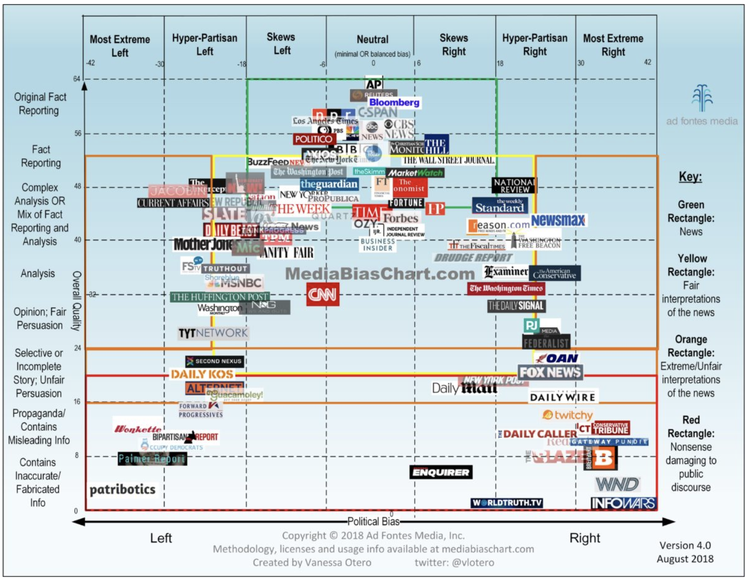

In [22]:
nb_setup.images_hconcat(["images/Media_Bias_Chart.png"], width = 750)

https://www.adfontesmedia.com/

# Paper
## Predicting Factuality of Reporting and Bias of News Media Sources

<br/>

**Ramy Baly, Georgi Karadzhov, Dimitar Alexandrov, James Glass, Preslav Nakov** <br/>
MIT Computer Science and Artificial Intelligence Laboratory, MA, USA <br/>
Qatar Computing Research Institute, HBKU, Qatar; <br/>
Sofia University, Bulgaria

## Background

* Focused on predicting **trustworthiness** (factuality and bias) of the **source** (the URL domain)
* Used features derived from:
  * Articles from the target website (to analyze: structure, sentiment, engagement, topic, complexity bias, morality)
  * Its Wikipedia page
  * Its Twitter account
  * The structure of its URL
  * Information about the Web traffic it has attracted
* This combination, as well as some of the sources, are novel for these problems.

## Method & Model
* Used information about **1,526** news media websites listed on the Media Bias/Fact Check website 
* Modeled factuality on a 3-point scale (**Low**, **Mixed**, and **High**)
* Bias on a 7-point scale (**Extreme-Left**, **Left**, **Center-Left**, **Center**, **Center-Right**, **Right**, and **Extreme-Right**)
* Used **Support Vector Machine (SVM)** classifier, training a separate model for factuality and for bias. 
* Report results for 5-fold cross-validation
* Performed an ablation study to evaluate the impact of removing one group of features at a time, as compared to using all the features

## Accuracy Output

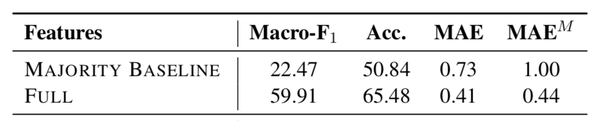

In [7]:
nb_setup.images_hconcat(["images/Fact_score.png"], width = 600)

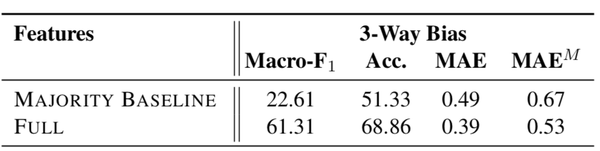

In [8]:
nb_setup.images_hconcat(["images/Bias3_score.png" ], width = 600)

## Other Similar Product
* **Chrome Add-on:** Owl Factor, Centr: Political Bias Detector, TrustedNews
* Media Bias/Fact Check Database
* FactCheck.org

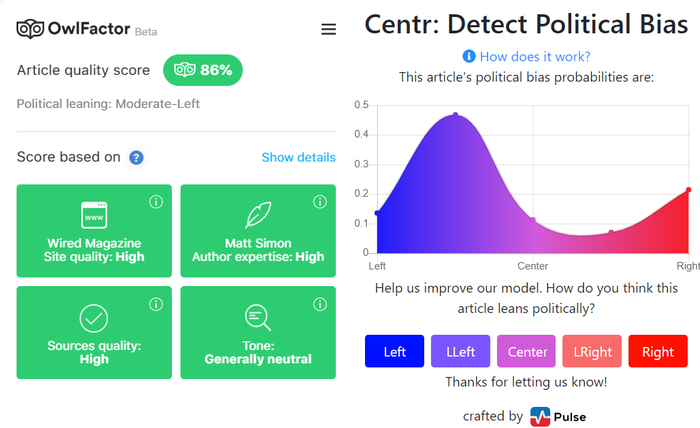

In [9]:
nb_setup.images_hconcat(["images/Product_OwlFactor.png", "images/Product_Centr.png"], width = [320,320])

## Efficient Method for Detecting Media Factuality & Bias
- Goal: Improved model with better efficiency
- **Wikipedia** and **Twitter** as a proxy for credibility
- Similar accuracy and less computational power

## Data Overview

In [10]:
%%html
<style>
  table {margin-left: 0 !important;}
    td {
  font-size: 30px
}
</style>

### Summary of Different Tasks:
<br/>
<table>
  <tr>
    <td><b>Factuality</b></td>
    <td>low, mixed, high&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td><b>3-Way Bias</b></td>
    <td>left, center, right&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>  
  <tr>
    <td><b>7-Way Bias</b></td>
    <td>extreme-left, left, center-left, center, center-right, right, extreme-right</td>
  </tr> 
</table>

### Summary of Features from Different Sources:
<br/>
<table>
  <tr>
    <td><b>traffic</b></td>    
    <td>alexa &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td><b>url</b></td>
    <td>handcrafted_url &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>  
  <tr>
    <td><b>twitter</b></td>
    <td>has_twitter, created_at, verified, location, url_match, counts, description</td>
  </tr>  
  <tr>
    <td><b>wikipedia</b></td>
    <td>has_wiki, wikicontent, wikisummary, wikitoc, wikicategories&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr> 
  <tr>
    <td><b>twitter</b></td>
    <td>has_twitter, created_at, verified, location, url_match, counts, description</td>
  </tr> 
  <tr>
    <td><b>articles</b></td>
    <td>body, title&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr> 
</table>

### Label Counts in Dataset

<br/>

<table>
  <tr>
    <td colspan="2"><b>Factuality</b></td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td colspan="2"><b>3-Way Bias</b></td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td colspan="2"><b>7-Way Bias</b></td>
  </tr>
  <tr>
    <td>Low</td>
    <td>256</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>Left</td>
    <td>189</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>Extreme-Left</td>
    <td>21</td>
  </tr>
  <tr>
    <td>Mixed</td>
    <td>268</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>Center</td>
    <td>564</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>Left</td>
    <td>168</td>
  </tr>
  <tr>
    <td>High</td>
    <td>542</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>Right</td>
    <td>313</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>Center-Left</td>
    <td>209</td>
  </tr>
  <tr>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>Center</td>
    <td>263</td>
  </tr>
  <tr>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>Center-Right</td>
    <td>92</td>
  </tr>
  <tr>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>Right</td>
    <td>157</td>
  </tr>
  <tr>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    <td>Extreme-Right</td>
    <td>156</td>
  </tr>
</table>

## Features Exploration 

### t-SNE Plot
**Feature: body (Fact vs. Bias)**

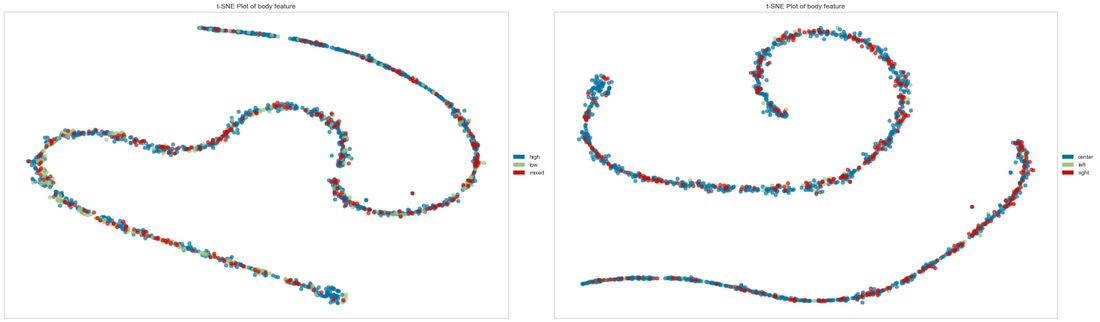

In [12]:
nb_setup.images_hconcat(["images/fact_body.jpeg", "images/bias_body.jpeg"], width = [550,550])

**Feature: title (Fact vs. Bias)**

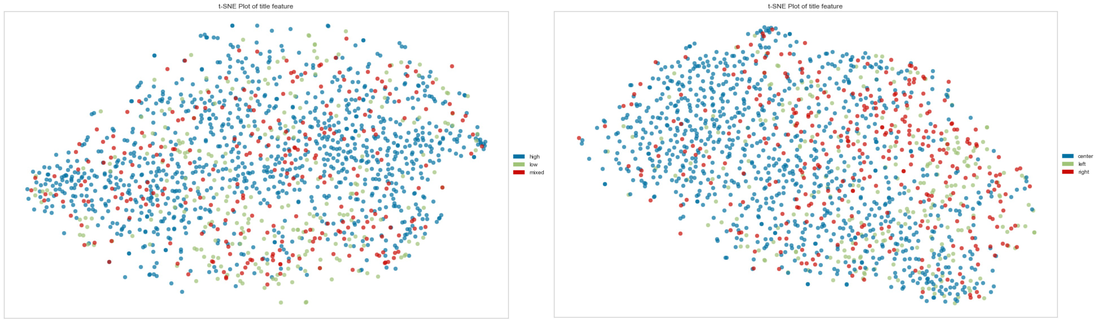

In [13]:
nb_setup.images_hconcat(["images/fact_title.jpeg", "images/bias_title.jpeg"], width = [550,550])

**Feature: wikicontent (Fact vs. Bias)**

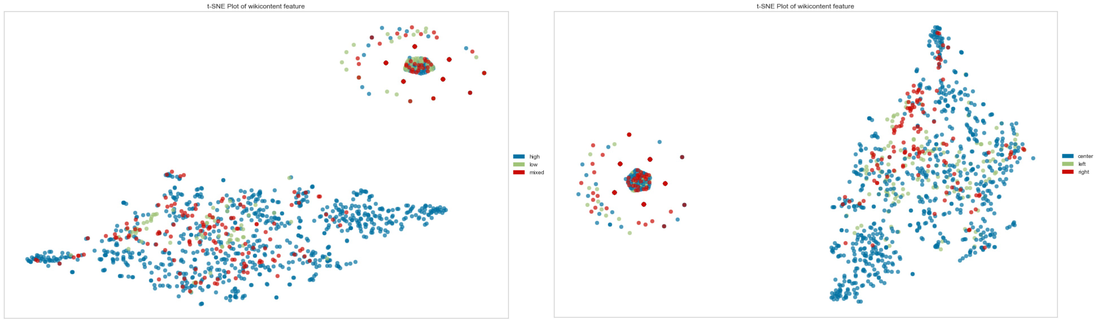

In [14]:
nb_setup.images_hconcat(["images/fact_wikicontent.jpeg", "images/bias_wikicontent.jpeg"], width = [550,550])

**Feature: wikisummary (Fact vs. Bias)**

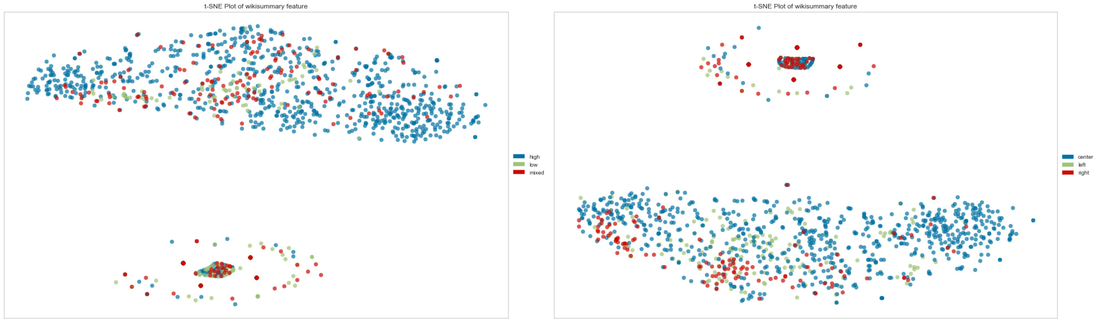

In [15]:
nb_setup.images_hconcat(["images/fact_wikisummary.jpeg", "images/bias_wikisummary.jpeg"], width = [550,550])

**Feature: wikicategories (Fact vs. Bias)**

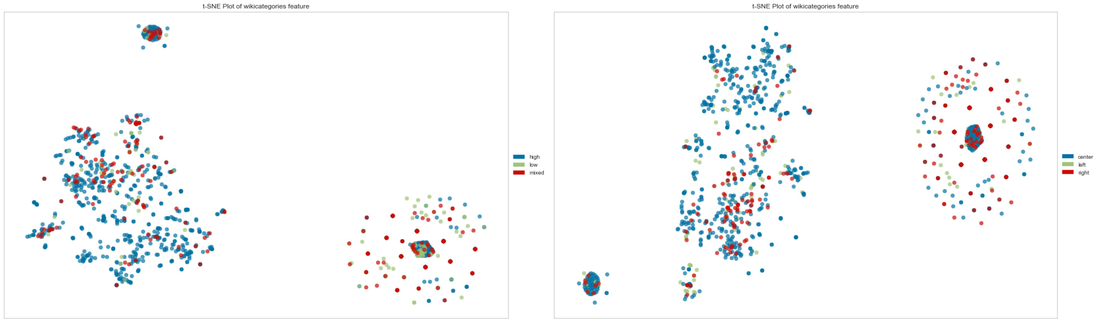

In [17]:
nb_setup.images_hconcat(["images/fact_wikicategories.jpeg", "images/bias_wikicategories.jpeg"], width = [550,550])

**Feature: wikitoc (Fact vs. Bias)**

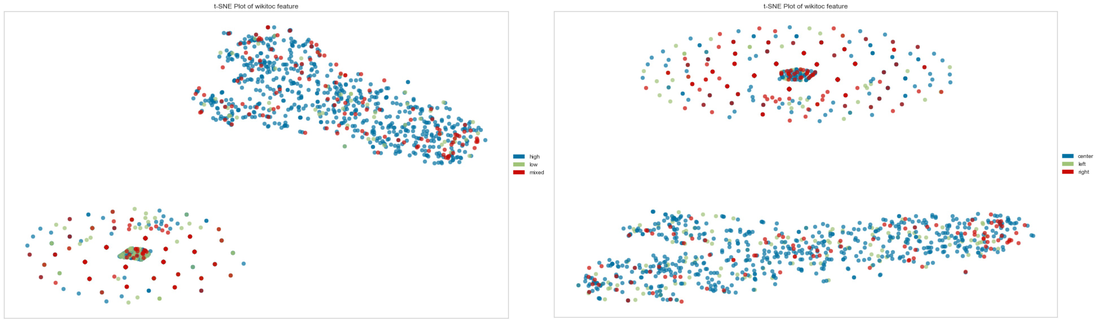

In [18]:
nb_setup.images_hconcat(["images/fact_wikitoc.jpeg", "images/bias_wikitoc.jpeg"], width = [550,550])

# Models

In [2]:
def CalculatePerformance(y_true, y_pred, task_main):
    f1 = f1_score(y_true, y_pred, average='macro') * 100
    acc = accuracy_score(y_true, y_pred) * 100
    num_classes = 7 if task == 'bias' else 3
    # calculate MAE_m
    err = 0
    num_samples = len(y_true)
    for c in range(num_classes):
        err_c = 0
        num_c = 0
        for i in range(num_samples):
            if y_true[i] == c:
                err_c += abs(y_true[i] - y_pred[i])
                num_c += 1
        err += err_c / num_c
    mae_m = err / num_classes
    # calculate MAE
    err = 0
    for i in range(num_samples):
        err += abs(y_true[i] - y_pred[i])
    mae = err / num_samples
    return [f1, acc, mae, mae_m]

In [3]:
def GetFeaturesAndLabels(features, task):
    data = pd.read_csv('data/corpus.csv')
    sources = data.source_url_processed
    X = np.empty(data.shape[0]).reshape(-1, 1)   
    for file in [f for f in os.listdir('data/features/') if '.csv' in f]:
        if file.replace('.csv', '') in features:
            feats = pd.read_csv('data/features/' + file)
            feats = feats[feats.iloc[:, 0].isin(sources)].as_matrix()
            feats = np.delete(feats, 0, axis=1).astype(float)
            X = np.hstack([X, feats[:, :-2]])
    X = np.delete(X, 0, axis=1)
    X = np.hstack([np.asarray(sources).reshape(-1, 1), X])
    X = pd.DataFrame(X)

    labels = {}
    labels['fact'] = {'low': 0, 'mixed': 1, 'high': 2}
    labels['bias'] = {'extreme-right': 0, 'right': 1, 'right-center': 2, 'center': 3, 'left-center': 4, 'left': 5, 'extreme-left': 6}
    data = pd.read_csv('data/corpus.csv')
    if task in labels.keys():
        y = data[task]
        y = [labels[task][L.lower()] for L in y]
    elif task == 'bias3way':
        y = data['bias']
        y = [labels['bias'][L.lower()] for L in y]
        y = [0 if L in [0, 1] else 1 if L in [2, 3, 4] else 2 for L in y]
    y = pd.DataFrame(np.asarray(y).reshape(-1, 1))
    return X, y

In [125]:
X, y = GetFeaturesAndLabels(features, task)
with codecs.open('data/splits.json', 'r') as f:
    splits = json.load(f)

In [134]:
for i in splits:
    print(i.keys())

dict_keys(['test-0', 'train-0'])
dict_keys(['test-1', 'train-1'])
dict_keys(['test-2', 'train-2'])
dict_keys(['test-3', 'train-3'])
dict_keys(['test-4', 'train-4'])


In [182]:
for i in splits:
    #i.items()
    #print(list(i.values()).split('\n'))
    #print(i.values().split('\n'))
    count = 0
    for key, value in i.items():
        value = list(value)
        if isinstance(value, list):
            count += len(value)
    print(count)
    

17890
17890
17890
17890
17890


## Logistic Classification

In [202]:
def Logistic(features, task):
    X, y = GetFeaturesAndLabels(features, task)
    with codecs.open('data/splits.json', 'r') as f:
        splits = json.load(f)
    y_true = []
    y_pred = []

    for i in range(5):
        print('fold ' + str(i))
        ids = splits[i]['train-{0}'.format(i)].split('\n')
        Xtr = np.delete(X[X.iloc[:, 0].isin(ids)].values, 0, axis=1).astype(float)
        ytr = np.asarray(y[X.iloc[:, 0].isin(ids)]).reshape(-1, y.shape[1])

        ids = splits[i]['test-{0}'.format(i)].split('\n')
        Xts = np.delete(X[X.iloc[:, 0].isin(ids)].values, 0, axis=1).astype(float)
        yts = np.asarray(y[X.iloc[:, 0].isin(ids)]).reshape(-1, y.shape[1])

        scaler = MinMaxScaler()
        scaler.fit(Xtr)
        Xtr = scaler.transform(Xtr)
        Xts = scaler.transform(Xts)
        
        penalty = ['l1', 'l2']
        c=[0.01,0.1,1,10]
        hyperparameters = dict(C=c, penalty=penalty)
        logistic = linear_model.LogisticRegression()
        logi = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
        best_model = logi.fit(Xtr, ytr.reshape(-1,))

        Logi_fold = LogisticRegression(penalty=best_model.best_estimator_.penalty, C = best_model.best_estimator_.C)
        Logi_fold.fit(Xtr,ytr.reshape(-1,))

        yhat=Logi_fold.predict(Xts)
        y_true.extend(yts)
        y_pred.extend(yhat.reshape(-1, 1))

    y_true = [yt[0] for yt in y_true]
    y_pred = [yp[0] for yp in y_pred]
    return CalculatePerformance(y_true, y_pred, task) 

In [79]:
task =[['fact']]

In [62]:
features=[['alexa'],['has_twitter+created_at+verified+location+url_match+counts+description'],\
          ['has_wiki+wikicontent+wikisummary+wikitoc+wikicategories'],['body+title'],['body+title+alexa+handcrafted_url+has_wiki+verified'],\
          ['verified+has_wiki+wikicontent'],['verified+has_wiki+wikicontent+alexa'],['verified+has_wiki+wikicontent+title'],\
         ['alexa+verified+has_wiki+wikicontent+wikicategories+title'],['alexa+verified+has_wiki+wikicontent+wikisummary+wikitoc+wikicategories+title']]

In [63]:
for i in task:
    for j in features:
        task=i[0]
        features=j[0]
        print('task:'   + task)
        print('features:'+ features)
        results= Logistic(features, task)
        print('Results:')
        print('F1\t{}'.format(results[0]))
        print('Acc.\t{}'.format(results[1]))
        print('MAE\t{}'.format(results[2]))
        print('MAE_u\t{}'.format(results[3]))

task:fact
features:alexa
fold 0
Best Penalty: l1
Best C: 10
fold 1
Best Penalty: l1
Best C: 0.01
fold 2
Best Penalty: l1
Best C: 0.01
fold 3
Best Penalty: l1
Best C: 0.01
fold 4
Best Penalty: l1
Best C: 0.01
Results:
F1	22.732793100815897
Acc.	50.93808630393997
MAE	0.7307692307692307
MAE_u	0.9987562189054726
task:fact
features:has_twitter+created_at+verified+location+url_match+counts+description
fold 0
Best Penalty: l2
Best C: 0.1
fold 1
Best Penalty: l1
Best C: 1
fold 2
Best Penalty: l1
Best C: 1
fold 3
Best Penalty: l2
Best C: 0.1
fold 4
Best Penalty: l2
Best C: 1
Results:
F1	45.33717256557363
Acc.	57.410881801125704
MAE	0.5816135084427767
MAE_u	0.6989946485285748
task:fact
features:has_wiki+wikicontent+wikisummary+wikitoc+wikicategories
fold 0
Best Penalty: l2
Best C: 1
fold 1
Best Penalty: l1
Best C: 1
fold 2
Best Penalty: l2
Best C: 1
fold 3
Best Penalty: l2
Best C: 0.1
fold 4
Best Penalty: l2
Best C: 0.1
Results:
F1	52.177767774213414
Acc.	60.787992495309574
MAE	0.519699812382739

In [74]:
features_1 = [['verified+has_wiki+wikicontent+wikisummary+wikitoc+wikicategories+title']]

In [75]:
for i in task:
    for j in features_1:
        task=i[0]
        features=j[0]
        print('task:'   + task)
        print('features:'+ features)
        results= Logistic(features, task)
        print('Results:')
        print('F1\t{}'.format(results[0]))
        print('Acc.\t{}'.format(results[1]))
        print('MAE\t{}'.format(results[2]))
        print('MAE_u\t{}'.format(results[3]))

task:fact
features:verified+has_wiki+wikicontent+wikisummary+wikitoc+wikicategories+title
fold 0
fold 1
fold 2
fold 3
fold 4
Results:
F1	59.205516693125446
Acc.	65.66604127579737
MAE	0.41181988742964354
MAE_u	0.47013448096234695


In [204]:
task =[['bias3way']]

In [205]:
features1=[['verified+has_wiki+wikicontent+title'],\
         ['alexa+verified+has_wiki+wikicontent+wikicategories+title'],['alexa+verified+has_wiki+wikicontent+wikisummary+wikitoc+wikicategories+title']]

In [206]:
for i in task:
    for j in features1:
        task=i[0]
        features=j[0]
        print('task:'   + task)
        print('features:'+ features)
        results= Logistic(features, task)
        print('Results:')
        print('F1\t{}'.format(results[0]))
        print('Acc.\t{}'.format(results[1]))
        print('MAE\t{}'.format(results[2]))
        print('MAE_u\t{}'.format(results[3]))

task:bias3way
features:verified+has_wiki+wikicontent+title
fold 0
fold 1
fold 2
fold 3
fold 4
Results:
F1	63.1102583969363
Acc.	70.35647279549718
MAE	0.3621013133208255
MAE_u	0.4894968755458638
task:bias3way
features:alexa+verified+has_wiki+wikicontent+wikicategories+title
fold 0
fold 1
fold 2
fold 3
fold 4
Results:
F1	60.2841843743582
Acc.	68.38649155722327
MAE	0.3921200750469043
MAE_u	0.528393341339436
task:bias3way
features:alexa+verified+has_wiki+wikicontent+wikisummary+wikitoc+wikicategories+title
fold 0
fold 1
fold 2
fold 3
fold 4
Results:
F1	60.529526751734764
Acc.	68.29268292682927
MAE	0.39587242026266417
MAE_u	0.5310065941849414


## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [4]:
def random_forest(features, task):
    X, y = GetFeaturesAndLabels(features, task)
    with codecs.open('data/splits.json', 'r') as f:
        splits = json.load(f)
    # placeholders to accumulate true and predicted labels
    y_true = []
    y_pred = []
    # start cross-validation
    for i in range(5):
        print('fold ' + str(i))
        # select training instances for current fold
        ids = splits[i]['train-{0}'.format(i)].split('\n')
        Xtr = np.delete(X[X.iloc[:, 0].isin(ids)].values, 0, axis=1).astype(float)
        ytr = np.asarray(y[X.iloc[:, 0].isin(ids)]).reshape(-1, y.shape[1])
        # select testing instances for current fold
        ids = splits[i]['test-{0}'.format(i)].split('\n')
        Xts = np.delete(X[X.iloc[:, 0].isin(ids)].values, 0, axis=1).astype(float)
        yts = np.asarray(y[X.iloc[:, 0].isin(ids)]).reshape(-1, y.shape[1])
        # min-max normalization of the data
        scaler = MinMaxScaler()
        scaler.fit(Xtr)
        Xtr = scaler.transform(Xtr)
        Xts = scaler.transform(Xts)
        rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=500, oob_score = True) 
        param_grid = { 'n_estimators': [500,1000],'max_features': ['auto', 'sqrt', 'log2'],'max_depth':[35,55]}
        # fine-tune SVM hyperparameters using the training data of current fold
        CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2,refit=True)
        best_model=CV_rfc.fit(Xtr, ytr.reshape(-1,))
        yhat = best_model.predict(Xts)
        y_true.extend(yts)
        y_pred.extend(yhat.reshape(-1, 1))
    # transform actual and predicted labels from numpy arrays into lists
    y_true = [yt[0] for yt in y_true]
    y_pred = [yp[0] for yp in y_pred]
    print('n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
    print('max_features:', best_model.best_estimator_.get_params()['max_features'])
    print('max_depth:', best_model.best_estimator_.get_params()['max_depth'])

    return CalculatePerformance(y_true, y_pred, task) 

In [5]:
task =[['fact']]

In [6]:
features=[['verified+has_wiki+wikicontent+title'],['alexa+verified+has_wiki+wikicontent+wikicategories+title'],
          ['alexa+verified+has_wiki+wikicontent+wikisummary+wikitoc+wikicategories+title'],['verified+has_wiki+wikicontent+wikisummary+wikitoc+wikicategories+title']]

In [7]:
for i in task:
    for j in features:
        task=i[0]
        features=j[0]
        print('task:'   + task)
        print('features:'+ features)
        results= random_forest(features, task)
        print('Results:')
        print('F1\t{}'.format(results[0]))
        print('Acc.\t{}'.format(results[1]))
        print('MAE\t{}'.format(results[2]))
        print('MAE_u\t{}'.format(results[3]))

task:fact
features:verified+has_wiki+wikicontent+title


C:\Users\TanK\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


fold 0
fold 1
fold 2
fold 3
fold 4
n_estimators: 1000
max_features: sqrt
max_depth: 35
Results:
F1	51.751817966253036
Acc.	63.41463414634146
MAE	0.4596622889305816
MAE_u	0.5463885743101834
task:fact
features:alexa+verified+has_wiki+wikicontent+wikicategories+title


C:\Users\TanK\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


fold 0
fold 1
fold 2
fold 3
fold 4
n_estimators: 1000
max_features: auto
max_depth: 55
Results:
F1	51.03065392185149
Acc.	62.94559099437148
MAE	0.46904315196998125
MAE_u	0.5557991150107396
task:fact
features:alexa+verified+has_wiki+wikicontent+wikisummary+wikitoc+wikicategories+title


C:\Users\TanK\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


fold 0
fold 1
fold 2
fold 3
fold 4
n_estimators: 500
max_features: auto
max_depth: 35
Results:
F1	50.23266926769217
Acc.	62.570356472795496
MAE	0.47560975609756095
MAE_u	0.5619904828945678
task:fact
features:verified+has_wiki+wikicontent+wikisummary+wikitoc+wikicategories+title


C:\Users\TanK\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


fold 0
fold 1
fold 2
fold 3
fold 4
n_estimators: 1000
max_features: auto
max_depth: 55
Results:
F1	50.86462428225914
Acc.	62.94559099437148
MAE	0.4718574108818011
MAE_u	0.5597053650107396


In [8]:
task =[['bias3way']]

In [ ]:
features=[['verified+has_wiki+wikicontent+title'],['alexa+verified+has_wiki+wikicontent+wikicategories+title'],
          ['alexa+verified+has_wiki+wikicontent+wikisummary+wikitoc+wikicategories+title'],['verified+has_wiki+wikicontent+wikisummary+wikitoc+wikicategories+title']]

In [ ]:
for i in task:
    for j in features:
        task=i[0]
        features=j[0]
        print('task:'   + task)
        print('features:'+ features)
        results= random_forest(features, task)
        print('Results:')
        print('F1\t{}'.format(results[0]))
        print('Acc.\t{}'.format(results[1]))
        print('MAE\t{}'.format(results[2]))
        print('MAE_u\t{}'.format(results[3]))

### Final Model t-SNE Plot 
**Feature: <br/>
title, twitter verification, wikicontent, wikisummary, wikicategories, wikitoc (Fact vs. Bias)**

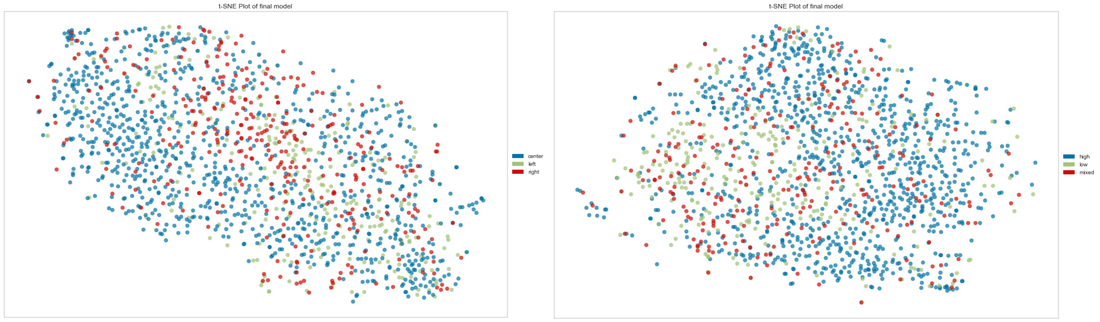

In [19]:
nb_setup.images_hconcat(["images/fact_finalModel.jpeg", "images/bias_finalModel.jpeg"], width = [550,550])

## Results
**Logistic regression + Lasso regularization** <br/>
similar F1 score for both <u>bias</u> and <u>facturality</u> prediction by just analyzing:
* **Wikipedia related variables**
* **Twitter account verification**
* **Article title**

## Business Use
* **Potential product for small startup** <br/>
  Cost efficient and fast computation model to predict article’s bias and factuality

* Ability to **extend to all news websites**

* **Real-time** source prediction

## Future Improvement
* More training data: Improve current model and enable more complicated model
* Whether author’s name is displayed or not (formatting)
* Update model over time in case fake website identify the importance of wiki and twitter account
* Sites association: social media interaction, common authors, sites plagiarism
* Credibility of website founder 

## Thank you!